# Azúcar y Sociedad

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
random.seed(10)

### Temas

- Agentes

### Wikipedia

All Sugarscape models include the agents (inhabitants), the environment (a two-dimensional grid) and the rules governing the interaction of the agents with each other and the environment.

The original model presented by J. Epstein & R. Axtell (considered as the first large scale agent model) is based on a 51x51 cell grid, where every cell can contain different amounts of sugar (or spice). In every step agents look around, find the closest cell filled with sugar, move and metabolize. They can leave pollution, die, reproduce, inherit sources, transfer information, trade or borrow sugar, generate immunity or transmit diseases - depending on the specific scenario and variables defined at the set-up of the model.

## Introducción

[**Sugarscape**](http://en.wikipedia.org/wiki/Sugarscape) es un modelo basado en agentes desarrollado por **Joshua M. Epstein** y **Robert Axtell**, presentado originalmente en _Growing Artificial Societies_. Consta de una rejilla 2D, en la que hay un bien abstracto, llamado `azucar`, los agentes vagan por la rejilla y acumulan `azúcar`.

El modelo original es el primer modelo de agentes a gran escala y ocurría en una rejilla de $51 \times 51$ celdas. En cada `step` los agentes miran alredor, encuentran la celda más cercana con `azúcar`, se mueven y metabolizan (tasa a la que consumen `azúcar`). La simulación puede ser complicada y se puede agregar que cada agente deje contaminación, se reproduzca, herede recursos, transfiera información, comercie, regale, transmita enfermedades, o haga la guerra. También es posible agregar un Gobierno que cobre impuestos cada determinado número de `steps` o que inclusive haya dos tipos de bien (en las simulaciones se llama `especia`).

## Preguntas a responder

- `YA!` Cree un clase `Habitante` que herede de nuestra clase `Agente`, implemente el algoritmo de comportamiento comentado en la introducción. 
- `YA!` Cree un clase `Sugarscape` que herede de nuestra clase `Mundo`. Representa mediante grados de color la fuerza del agente y la cantidad de azúcar en la celda.
- `YA!` Cree una clase `Bien` que represente al `azúcar` de **Sugarscape**.
- `YA!` Ejecuta una simulación sencilla, con agentes consumiendo recursos y acaparándolos. Inicializa los agentes con diferentes capacidades de almacenar azúcar, consumo de azúcar (metabolismo) y rango de visión.
- `YA!` Agrega un factor de regeneración del `azúcar`.
- `YA!` Agrega que el agente muera por hambre.
- `YA!` Agrega un tiempo de vida máximo.
- `YA!` Agrega el comportamiento de que nuevos agentes sean creados cuando un agente muera.
- `A medias!` Agrega la `especia` al modelo, también es necesario para vivir. Su valor nutrimental es diferente al del `azúcar`.
- `YA!` Agrega la habilidad de comerciar.
- Agrega una `tribu` al agente. 
- `YA!` Agrega un factor de reproducción asexual. (Si tiene suficiente energía, se divide en dos).
- `YA!` Agrega una variable `sexo`.
- `YA!` Agrega reproducción sexual (Si está en su edad fértil, ambos tienen energía y le transmiten la mitad a su hijo).
- Grafica la [**curva de Lorenz**](http://en.wikipedia.org/wiki/Lorenz_curve) y el [**coeficiente de Gini**](http://en.wikipedia.org/wiki/Gini_coefficient), grafica también la población y la cantidad de azúcar. ¿Qué interpretación le das a las gráficas?

### Pre-Solución

 Clases `Agente` y `Mundo` vistas en clase.
 
 Ya se modifica aquí para que solo se mueva N-S-E-O.

In [3]:
class Agente:
    """ Agente general """
    def __init__(self, tipo, locacion=np.array([0,0])):
        self.tipo = tipo
        self.locacion = locacion
        self.siguiente_accion = None

    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  # Otra manera es usar np.sqrt(np.sum((a-b)**2))
    
    def vecinos(self, agentes):
        pass
    
    def actuar(self, agentes):
        self.locacion =  self.siguiente_accion
        
    def decidir(self, agentes):
        self.siguiente_accion = np.array([random.randint(0, 51), random.randint(0, 51)]) # Toma una nueva posición al azar
    
    def actualizar(self, agentes):
        self.decidir(agentes)
        self.actuar(agentes)

In [4]:
class Mundo:
    def __init__(self, agentes, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
        print ("Creado el mundo")
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 4, 'alpha' : .6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames = self.steps, interval = 1000, blit = False)
        return anim

Creado el mundo


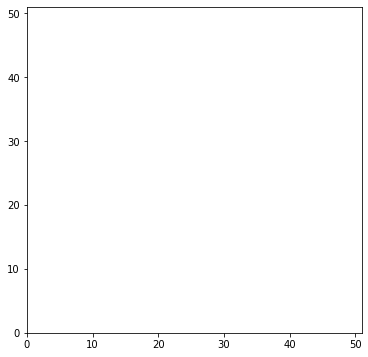

In [5]:
num_agentes = 250

agentes_simples = [Agente(tipo=0) for i in range(num_agentes)]


sin_chiste = Mundo(agentes = agentes_simples, steps = 10)


simulacion = sin_chiste.simular()

In [6]:
HTML(simulacion.to_html5_video())

Un ejemplo de aplicación visto en clase

In [11]:
class AgenteSchelling(Agente):
    
    def __init__(self, tipo, homofilia = 5, vecinos = 7):
        Agente.__init__(self, tipo)
        self.homofilia = homofilia
        self.vecinos = vecinos # Quienes son mis vecinos
        self.feliz = False
        self.locacion = np.array([random.uniform(0, 51), random.uniform(0, 51)]) # Posición al azar inicial
        
    def actuar(self, agentes):
        self.locacion = np.array([random.uniform(0, 51), random.uniform(0, 51)]) # Brinco a una nueva posición
        
    def decision(self, agentes):
        """Verdadero si un número suficiente de vecinos cercanos es del mismo tipo."""
        distancias = []
        # Distancias es una lista de pares (distancia, agente)
        for agente in agentes:
            if self != agente:
                distancia = self.distancia(agente)
                distancias.append((distancia, agente))
        # Ordenamos del más cercano al más lejano 
        distancias.sort()
        vecinos = [agente for dist, agente in distancias[:self.vecinos]]
        # Contamos cuantos vecinos son del mismo tipo 
        num_mismo_tipo = sum(self.tipo == agente.tipo for agente in vecinos)
        
        self.feliz = (num_mismo_tipo >= self.homofilia)
        
        return self.feliz

    def actualizar(self, agentes):
        """Si no está feliz, escoge una posición nueva al azar, sólo se detiene cuando está feliz."""
        self.decision(agentes)
        if not self.feliz:
            self.actuar(agentes) # No estaba feliz en la ultima ronda
            

            

In [12]:
class MundoSchelling(Mundo):
    
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos_0, = self.ax.plot([], [], 'o', markerfacecolor='orange', **plot_args)
        self.puntos_1, = self.ax.plot([], [], 'o', markerfacecolor='green', **plot_args)
    
    def clean_screen(self):
        self.puntos_0.set_data([], [])
        self.puntos_1.set_data([], [])
        return 
    
    def dibujar(self,step):
   
        x_values_0, y_values_0 = [], []
        x_values_1, y_values_1 = [], []
    
        for agente in self.agentes:
            x, y = agente.locacion
            if agente.tipo == 0:
                x_values_0.append(x)
                y_values_0.append(y)
            else:
                x_values_1.append(x)
                y_values_1.append(y)

                
        self.puntos_0.set_data(x_values_0, y_values_0)
        self.puntos_1.set_data(x_values_1, y_values_1)
        
        self.ax.set_title('Paso {}'.format(step))

        return 

Creado el mundo


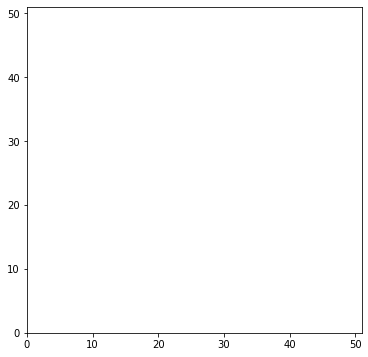

In [13]:
num_tipo_0 = 200
num_tipo_1 = 200

agentes = [AgenteSchelling(tipo=0) for i in range(num_tipo_0)]
agentes.extend(AgenteSchelling(tipo=1) for i in range(num_tipo_1))

schelling_world = MundoSchelling(agentes = agentes, steps = 30)

simu_schelling = schelling_world.simular()

In [10]:
HTML(simu_schelling.to_html5_video())

### Solución

In [10]:
possible_coords(2)

array([[-1,  0],
       [ 1,  0],
       [ 0, -1],
       [ 0,  1],
       [-2,  0],
       [ 2,  0],
       [ 0, -2],
       [ 0,  2]])

In [66]:
l = get_coords(2,2)
l

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [68]:
l2 = []

for i in range(len(l)):
    l2.append([random.randint(0,5)])
    
azucar = np.append(l, l2, axis = 1)
azucar

array([[0, 0, 2],
       [0, 1, 0],
       [1, 0, 2],
       [1, 1, 3]])

array([[0, 0, 4],
       [0, 1, 0],
       [1, 0, 3],
       [1, 1, 3]])

### Sugarscape

In [59]:
class Bien:
    
    def __init__ (self, num_agentes = 100, x = 51, y = 51, growth_rate = 1):
        self.x = x
        self.y = y
        # self.growth_rate = growth_rate
        # self.sugar_limit = random.randint(0,5)
        # self.num_agentes = num_agentes
        self.agent_count = []
        self.list = []
        self.make_sugar()
        self.make_agentes()
    
    def make_sugar(self):
        
        self.coords = get_coords(self.x, self.y)
        np.random.shuffle(self.coords)

        
        for i in range(len(self.coords)):
            self.list.append([random.randint(0,5)])
            
        self.azucar_regada = np.append(self.coords, self.list, axis = 1)
        
        return self.azucar_regada
        
        
    def make_agentes(self):
        
        # Hacemos a TODOS los agentes
        self.positions = np.array([self.coords[i] for i in range(self.num_agentes)])
        # self.agentes = np.array([[self.positions[i], self.habitante.vision, self.habitante.metabolismo] for i in range(self.num_agentes)])
        self.ocupadas = np.array([i for i in self.positions])
        self.vacias = np.array([i for i in self.positions if i not in self.ocupadas]) 
        

Creado el mundo


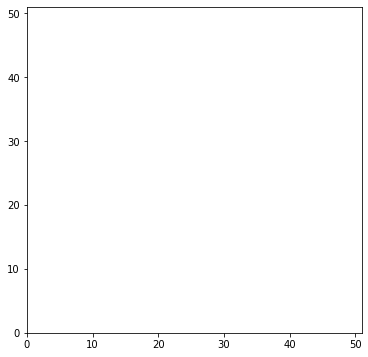

In [82]:

azucar_simples = Bien()

agente_simple = 


sin_chiste = Sugarscape(agentes = agentes_simples, steps = 10)


simulacion = sin_chiste.simular()

In [83]:
HTML(simulacion.to_html5_video())

AttributeError: type object 'Bien' has no attribute 'num_agentes'

In [22]:
class Sugarscape(Mundo):  
        
    def __init__(self, agentes, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
        print ("Creado el mundo")
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 4, 'alpha' : .6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        
        for agente in range(Bien.num_agentes):
            x, y = Bien.positions[agente]
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        """
        for agente in Bien.num_agentes:
            Bien.actualizar(self.agentes)
        """
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames = self.steps, interval = 1000, blit = False)
        return anim

In [15]:

bien_test = Bien(52, num_agentes)



### PREGUNTARLE A MIGUEL CÓMO HACERLE PARA QUE SÍ CORRA

In [20]:
class Habitante(Agente):
    
    def __init__(self, age = 0):
        
        self.metabolismo = random.uniform(1,4)
        self.vision = random.randint(1,6)
        self.life = random.randint(0,20)
        self.age = 0
        self.vivo = True

    
    def look_move(self, position, vision):
        
        self.locs = possible_coords(self.vision)
        self.visible_locs = self.locs + self.position
        self.vacias = np.array([i for i in self.positions if i not in self.ocupadas])    
    
        if len(self.vacias) == 0:
            return self.position
        
        self.locs_azucar = [self.visible_locs[i][2] for i in range(len(self.visible_locs))]
        self.place = np.argmax(self.locs_azucar)
        
        return self.locs_azucar[i]
    
    
    def actuar(self):
        self.loc = bien.look_move(bien.agentes[0], self.vision)
        self.age += 1
    
    def dying(self):
        return self.age > self.life   
    
    def starving(self):
        return self.sugar < 0
    
    def actualizar(self):

        for agente in self.agentes:
            self.ocupadas.remove(habitante.loc)
            habitante.actuar(self)

            if habitante.starving() or habitante.dying():
                self.agentes.remove(agente)
                
            else:
                self.occupied.add(habitante.loc)


        self.agent_count.append(len(self.agentes))

## Preguntas adicionales

In [16]:
class Habitante(Agente):
    
    def __init__(self, bien, age = 0):
        # Agente.__init__(self, tipo)
        self.bien = bien
        self.agent_count = []
        # self.metabolismo = random.uniform(1,4)
        self.vision = random.randint(1,6)
        self.life = random.randint(0,20)
        self.age = 0
        self.vivo = True
        completo = False
        
        while (completo == False):
            self.locacion_0 = np.array([random.randint(0, 51), random.randint(0, 51), 0])
            
            if(self.locacion_0 not in bien.ocupadas):
                self.locacion = self.locacion_0
                complete = True

    def decision(self, position, vision):
        
        self.locs = possible_coords(self.vision)
        self.visible_locs = self.locs + self.locacion
        self.vacias = [i for i in self.bien.coords if i not in np.array(self.bien.ocupadas)]
    
        if len(self.vacias) == 0:
            return self.locacion
        
        self.locs_azucar = [self.visible_locs[i][2] for i in range(len(self.visible_locs))]
        self.place = np.argmax(self.locs_azucar)
        
        return self.locs_azucar[i]
    
    def actuar(self):
        
        self.loc = self.decision(self.locacion, self.vision)
        self.age += 1
    
    def dying(self):
        return self.age > self.life   
    
    def starving(self):
        return self.sugar < 0
    
    
    def actualizar(self):
        self.bien.ocupadas.remove(self.loc)
        self.actuar(self)

            # if self.starving() or self.dying():
                # self.agentes.remove(agente)
        self.bien.ocupadas.add(self.loc)



- ¿Qué pasa si la variable `tribu` afecta el comercio y el sexo? ¿Cómo lo simularías y por qué?
- ¿Cómo simularías **guerra primitiva**?
- ¿Cómo simularías **enfermedad**?
- ¿Quieres incluir **genética**? 
    - Define una cadena binaria (i.e. de ceros y unos) en los que se estén codificadas el sexo, capacidad de almacenar azúcar, metabolismo, rango de visión.
    - Cuando los agentes se reproduzcan sexualmente, realiza un [`crossover`](http://en.wikipedia.org/wiki/Crossover_(genetic_algorithm)) para determinar los atributos de los agentes de la siguiente generación.
- Agrega una asimetría de sexo, esto lo puedes modelar con un `offspring_cost` que sea mayor para uno de los sexos. Entonces antes de reproducirse sexualmente, hay una decisión por parte de los agentes.

## Bibliografía

- **Epstein, Joshua M.; Axtell, Robert** (October 11, 1996). _Growing artificial societies: social science from the bottom up_. `Brookings Institution Press. p. 224. ISBN 978-0-262-55025-3.`
- **Wikipedia** [_Sugarscape_](http://en.wikipedia.org/wiki/Sugarscape)

In [227]:
bien_test = Bien()

bien_test.azucar_regada

array([[12, 39,  2],
       [30, 12,  1],
       [36, 39,  2],
       ...,
       [26, 10,  4],
       [11, 45,  5],
       [30,  1,  0]])

In [187]:
punto = np.array([1,2])
punto

array([1, 2])

In [120]:
l2 = get_coords(2,2)
l2

for i in range(len(l2)):
    l.append(l2[i])

print(l)
np.vstack(l)
        

[array([0, 0]), array([0, 1]), array([1, 0]), array([1, 1])]


array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [168]:
l = []
l2 = []
for i in range(5):
    l2 = l.append(np.array([0,0]))
l

[array([0, 0]), array([0, 0]), array([0, 0]), array([0, 0]), array([0, 0])]

In [75]:
class Bien:
    
    def __init__ (self, x = 52, y = 52, growth_rate = 1):
        self.x = x
        self.y = y
        self.list = []
        self.ocupadas = []
        self.make_sugar()
        self.growth_rate = growth_rate
    
    def make_sugar(self):
        
        self.coords = get_coords(self.x, self.y)
        np.random.shuffle(self.coords)

        
        for i in range(len(self.coords)):
            self.list.append([random.randint(0,5)])
            
        self.azucar_regada = np.append(self.coords, self.list, axis = 1)
    
    # def grow_sugar(self):
        
        
       
    

In [76]:
np.array([random.randint(0, 51), random.randint(0, 51)])

array([0, 1])

In [101]:
class Habitante(Agente):
    
    def __init__(self, bien, age = 0):
        # Agente.__init__(self, tipo)
        self.bien = bien
        self.agent_count = []
        # self.metabolismo = random.uniform(1,4)
        self.vision = random.randint(1,6)
        self.life = random.randint(0,20)
        self.age = 0
        self.vivo = True
        completo = False
        self.locacion = np.array([random.randint(0, 51), random.randint(0, 51), 0])
        bien.ocupadas.append(self.locacion)
            


    def decision(self, position, vision):
        
        self.locs = possible_coords(self.vision)
        self.visible_locs = self.locs + self.locacion
        self.vacias = [i for i in self.bien.coords if i not in np.array(self.bien.ocupadas)]
    
        if len(self.vacias) == 0:
            return self.locacion
        
        self.locs_azucar = [self.visible_locs[i][1] for i in range(len(self.visible_locs))]
        self.place = np.argmax(self.locs_azucar)
        
        return self.locs_azucar[i]
    
    def actuar(self, agentes):
        
        self.loc = self.decision(self.locacion, self.vision)
        self.age += 1
    
    def dying(self):
        return self.age > self.life   
    
    def starving(self):
        return self.sugar < 0
    
    
    def actualizar(self, agentes):
        #self.bien.ocupadas.remove(self.loc)
        if self.vivo:
            self.actuar(agentes)

            # if self.starving() or self.dying():
                # self.agentes.remove(agente)
        #self.bien.ocupadas.add(self.loc)


In [105]:
agente_simple = Habitante(azucar_simples)
agente_simple.vivo

True

In [86]:
class Sugarscape(Mundo):
    def __init__(self, agentes, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
        print ("Creado el mundo")
        
        
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 4, 'alpha' : .6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        
        for agente in self.agentes:
            x, y = agente.loc
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames = self.steps, interval = 1000, blit = False)
        return anim

Creado el mundo


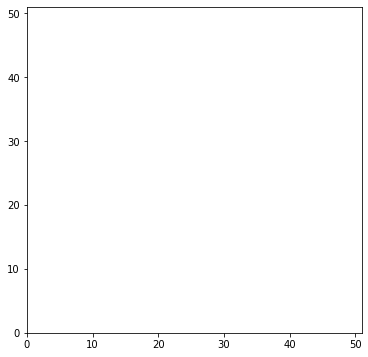

In [87]:
azucar_simples = Bien()
num_agentes = 20
agente_simple = [Habitante(azucar_simples) for i in range(num_agentes)]
sin_chiste = Sugarscape(agentes = agente_simple, steps = 10)


simulacion = sin_chiste.simular()

In [88]:
HTML(simulacion.to_html5_video())

AttributeError: 'Habitante' object has no attribute 'loc'

`get_coords` toma las dimeniones de la rejilla, $51x51$, y regresa un array donde cada elemento del array es una cordenada de la rejilla. 

In [72]:
def get_coords(n, m):
    """
    Hace un np.array donde cada elemento del array es el índice de una n x m rejilla
    """
    t = [[i, j] for i in range(n) for j in range(m)]
    return np.array(t)

In [73]:
get_coords(2,2)

array([[0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 1, 0]])

`make_visible_coords` toma el rango de la visión del agente y regresa un array donde cada elemento del arrat es la coordenada de una casilla visible para el agente. 

Recordemos que los movimientos son Norte-Sur-Este-Oeste

In [99]:
def possible_coords(vision):
    """
    Calcula los posibles movimientos de los agentes dependiendo de su visión
    """
    def make_mov(punto):
        mov = [[-punto, 0, 0] , [punto, 0, 0], [0, -punto, 0], [0, punto, 0]]
        return mov
                     
    movimientos = [make_mov(mov) for mov in range(1, vision+1)]
    return np.vstack(movimientos)